## Decision Tree

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/01/Decision_Tree_2.png"/>

In [1]:
# Log Transformation 

# Loan Approval 

# customer demographical | avg bank acocunt manitained |   Loan (y/n)
#.                       | $765,987                    |
#.                       | $.   300
#.                       | $.    10
#.                       | $. 18.3M


# log10(100) = 2
# log10(10). = 1

In [2]:
import math

In [3]:
math.log10(100)

2.0

In [4]:
math.log10(1000)

3.0

In [ ]:
# Course A  - Limited Syllabus (5 chapters)
# Course B  - Unlimited syllabus

In [ ]:
# Gini Score

# p - probability of an event happening 
# q - probability for not happening of that event 

# p^2 + q^2 

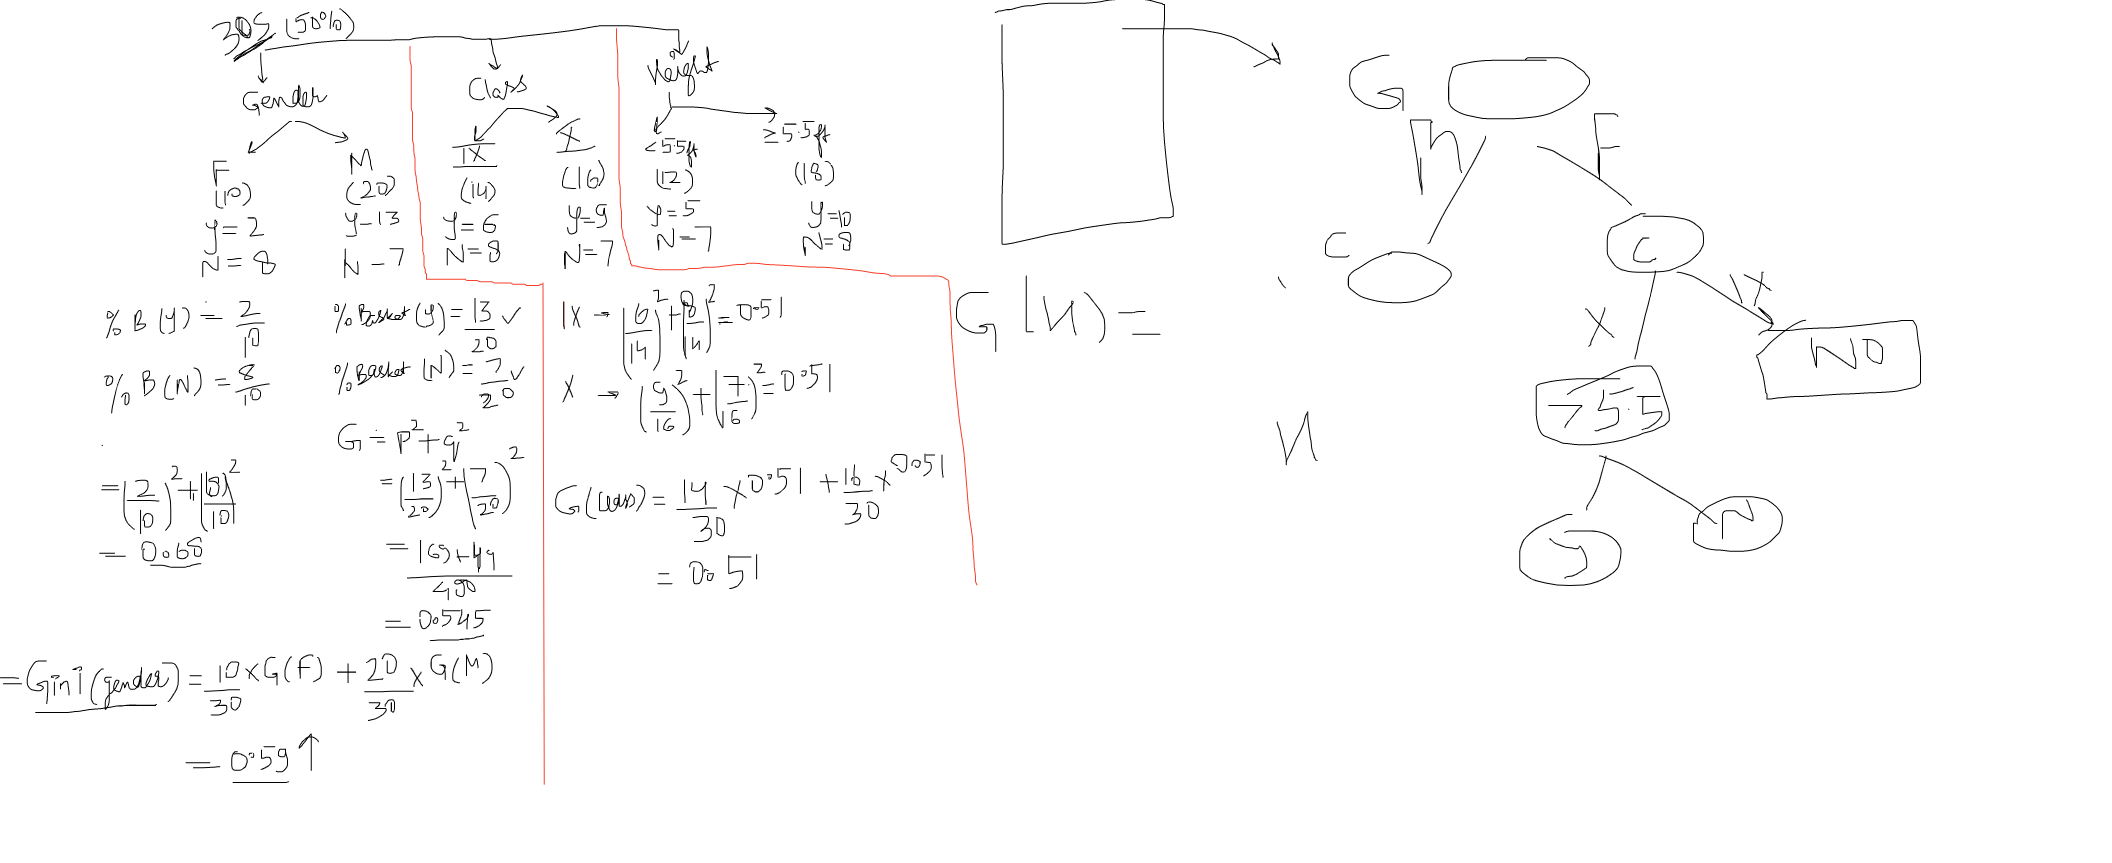

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [6]:
from sklearn.datasets import load_iris

In [7]:
dataset = load_iris()

In [8]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
df = pd.DataFrame(data = dataset.data, 
                  columns= dataset.feature_names)
df["target"] = dataset.target

In [10]:
df.head()

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]

In [11]:
df.columns = [col.replace(" (cm)", "").replace(" ", "_") for col in df.columns]

In [12]:
df.head()

sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtc = DecisionTreeClassifier()

In [17]:
dtc.fit(X= train_df.drop(columns=["target"]), 
        y = train_df.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
test_df.sample(5)

sepal_length  sepal_width  petal_length  petal_width  target
141           6.9          3.1           5.1          2.3       2
116           6.5          3.0           5.5          1.8       2
65            6.7          3.1           4.4          1.4       1
54            6.5          2.8           4.6          1.5       1
81            5.5          2.4           3.7          1.0       1

In [19]:
dtc.predict([[6.7, 3.1, 4.4, 1.4]])

array([1])

In [20]:
y_pred = dtc.predict(test_df.drop(columns=["target"]))

In [21]:
y_pred 

array([0, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 0, 0, 2, 2, 1, 2])

In [24]:
y_act = test_df.target.values
y_act

array([0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 0, 0, 2, 2, 1, 2])

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
accuracy_score(y_act, y_pred)

0.9666666666666667

In [26]:
confusion_matrix(y_act, y_pred)

array([[10,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 11]])

In [28]:
print(classification_report(y_act, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Feature Importance

In [34]:
pd.DataFrame(dtc.feature_importances_, index=dataset.feature_names).sort_values(by=0, ascending=False)

0
petal width (cm)   0.896407
petal length (cm)  0.055636
sepal length (cm)  0.047957
sepal width (cm)   0.000000

In [35]:
df.sample(5)

sepal_length  sepal_width  petal_length  petal_width  target
6             4.6          3.4           1.4          0.3       0
61            5.9          3.0           4.2          1.5       1
105           7.6          3.0           6.6          2.1       2
65            6.7          3.1           4.4          1.4       1
16            5.4          3.9           1.3          0.4       0

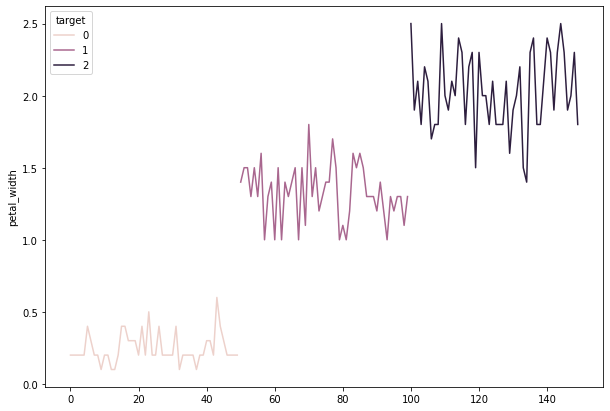

In [38]:
plt.figure(figsize=(10, 7))
sns.lineplot(x=df.index, y= df.petal_width, hue=df.target)

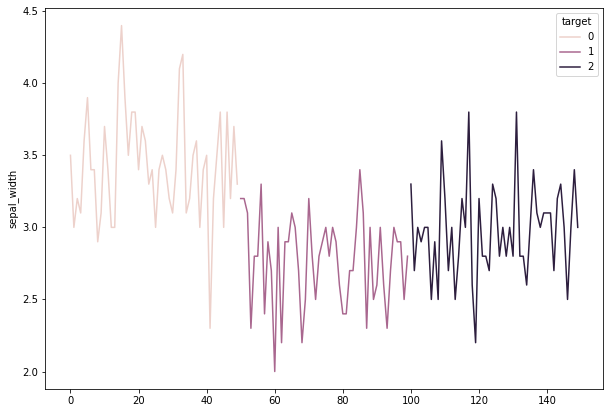

In [40]:
plt.figure(figsize=(10, 7))
sns.lineplot(x=df.index, y=df.sepal_width, hue=df.target)

### Plot Tree

In [41]:
from sklearn.tree import plot_tree

No handles with labels found to put in legend.


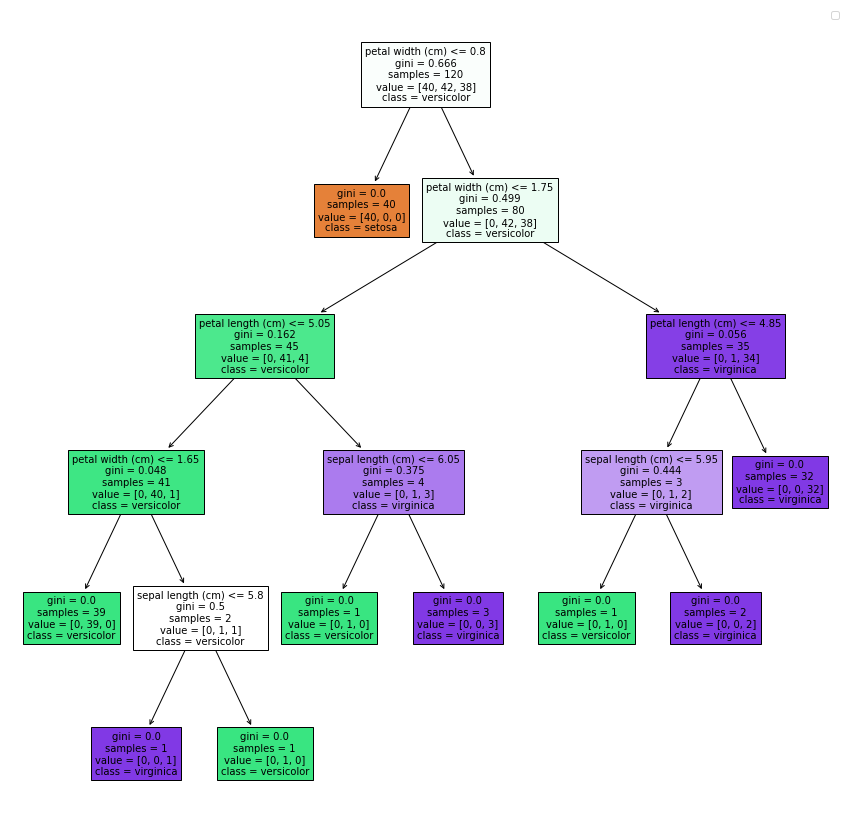

In [50]:
plt.figure(figsize=(15, 15))
plot_tree(dtc, feature_names=dataset.feature_names, class_names=dataset.target_names, filled=True, fontsize=10)
plt.legend()
plt.show()

### Hyper Parameter Tunning

In [51]:
?DecisionTreeClassifier

# Major HP 
# 1. max_depth         - Depth of a tree 
# 2. max_features      - 
# 3. min_samples_split - 
# 4. max_leaf_nodes    - 